In [2]:
# handwritten digit recognition 

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

mnist = tf.keras.datasets.mnist
tf.get_logger().setLevel('ERROR')

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# create the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# compile, train, and save model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)
model.save('handwritten.model.keras')

2025-11-07 14:18:50.750582: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-07 14:18:50.750754: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-07 14:18:50.786317: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-07 14:18:51.679118: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/home/jsperhac/miniconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-11-07 14:18:53.677240: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9247 - loss: 0.2597
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9670 - loss: 0.1078
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9758 - loss: 0.0742


Image 1: This digit is probably a 2 (confidence: 99.3%)


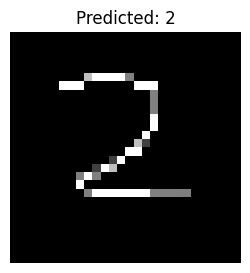

Image 2: This digit is probably a 4 (confidence: 99.6%)


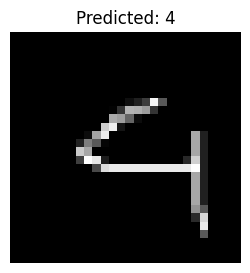

Image 3: This digit is probably a 8 (confidence: 81.2%)


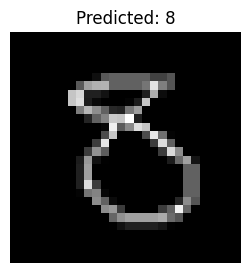

Image 4: This digit is probably a 3 (confidence: 61.1%)


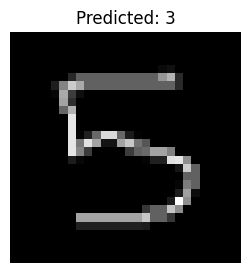

Image 5: This digit is probably a 2 (confidence: 99.8%)


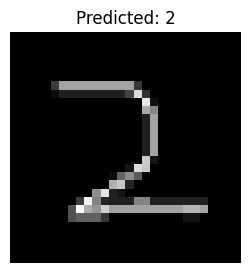

Image 6: This digit is probably a 8 (confidence: 100.0%)


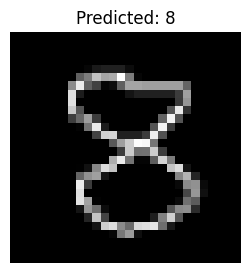

Image 7: This digit is probably a 5 (confidence: 86.1%)


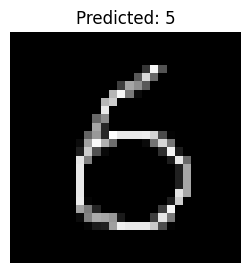

Image 8: This digit is probably a 3 (confidence: 99.9%)


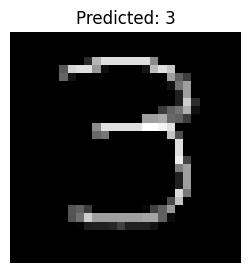

Image 9: This digit is probably a 4 (confidence: 28.9%)


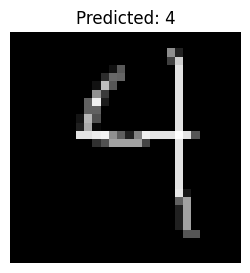

In [4]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


# Load your model
model = tf.keras.models.load_model('handwritten.model.keras')

image_number = 1
while os.path.isfile(f"./test-numbers/digit_{image_number}.png"):
    try:
        # Read the image in grayscale
        img = cv2.imread(f"./test-numbers/digit_{image_number}.png", cv2.IMREAD_GRAYSCALE)

        # Check if image was loaded successfully
        if img is None:
            print(f"Could not load digit_{image_number}.png")
            image_number += 1
            continue

        # Resize to 28x28 if needed (MNIST standard)
        if img.shape != (28, 28):
            img = cv2.resize(img, (28, 28))

        # Normalize to 0-1 range
        img = img.astype(np.float32) / 255.0

        # Invert if needed (MNIST has white digits on black background)
        # Check if digit appears to be dark on light background
        if np.mean(img) > 0.5:
            img = 1.0 - img

        # Reshape for model input: (1, 28, 28, 1) for typical CNN models
        img_reshaped = img.reshape(1, 28, 28, 1)

        # Make prediction
        prediction = model.predict(img_reshaped, verbose=0)
        predicted_digit = np.argmax(prediction)
        confidence = np.max(prediction) * 100

        print(f"Image {image_number}: This digit is probably a {predicted_digit} (confidence: {confidence:.1f}%)")

        # Display the image
        plt.figure(figsize=(3, 3))
        plt.imshow(img, cmap='gray')
        plt.title(f"Predicted: {predicted_digit}")
        plt.axis('off')
        plt.show()

        image_number += 1

    except Exception as e:
        print(f"Error processing digit_{image_number}.png: {e}")
        image_number += 1